In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
final_df = pd.read_csv("final_transition_in_poss_df.csv")
team_ids = final_df['uniqueTeamId']

In [3]:
final_df

,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,Smart_pass_Ratio_Total,High_pass_Ratio_Zone2,...,Side Pass Ratio,Short Ratio,Middle Ratio,Long Ratio,average_pass_length,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio Ratio,Near Shots Ratio,Connectivity
0,10531---2499726,0.047619,0.085714,0.085714,0.780952,213,0.145540,0.849765,0.004695,0.060606,...,0.474178,0.267606,0.323944,0.408451,25.923929,2.0,0.000,0.000000,1.00,5.051282
1,10531---2499736,0.029787,0.080851,0.080851,0.808511,238,0.155462,0.836134,0.008403,0.077778,...,0.495798,0.373950,0.319328,0.306723,25.496242,2.0,0.500,0.002101,0.00,5.461538
2,10531---2499741,0.034043,0.072340,0.072340,0.821277,238,0.168067,0.823529,0.008403,0.153846,...,0.478992,0.289916,0.319328,0.390756,26.409845,1.0,0.000,0.000000,1.00,5.576923
3,10531---2499757,0.021583,0.082734,0.079137,0.816547,281,0.153025,0.832740,0.014235,0.095238,...,0.480427,0.302491,0.309609,0.387900,26.078901,1.0,0.000,0.000000,1.00,5.589744
4,10531---2499766,0.030675,0.104294,0.110429,0.754601,166,0.234940,0.753012,0.012048,0.144737,...,0.379518,0.210843,0.259036,0.530120,30.241780,1.0,0.000,0.000000,1.00,4.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,0.050388,0.089147,0.089147,0.771318,261,0.187739,0.800766,0.011494,0.112069,...,0.532567,0.306513,0.287356,0.406130,28.875240,6.0,0.000,0.001916,0.50,5.021978
3648,756---2565892,0.048246,0.109649,0.114035,0.728070,231,0.155844,0.835498,0.008658,0.103774,...,0.502165,0.320346,0.337662,0.341991,25.158064,4.0,0.500,0.002165,0.00,6.666667
3649,756---2565904,0.032922,0.053498,0.053498,0.860082,246,0.231707,0.756098,0.012195,0.156627,...,0.491870,0.325203,0.260163,0.414634,27.640545,5.0,0.000,0.003252,0.20,6.653846
3650,756---2565908,0.049669,0.089404,0.096026,0.764901,305,0.144262,0.839344,0.016393,0.104575,...,0.445902,0.308197,0.337705,0.354098,26.000048,5.0,0.400,0.001311,0.20,5.582418


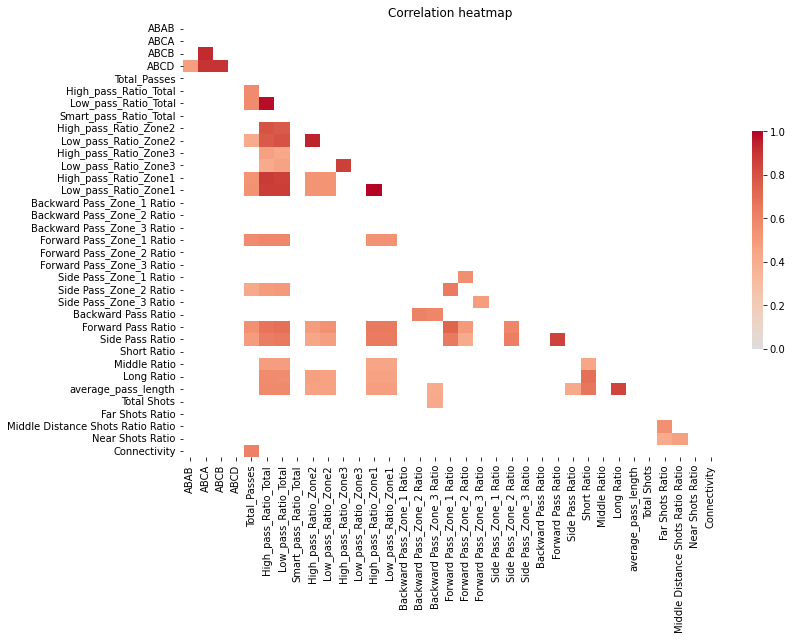

In [4]:
corr = final_df.drop(["uniqueTeamId"], axis = 1).corr().abs()
corr[corr.abs() < 0.4] = np.nan

plt.figure(figsize=(12, 8))
sns.heatmap(corr.abs(), cmap="coolwarm", 
            mask=np.triu(np.ones_like(corr.abs(), dtype=bool)),
            cbar_kws={"shrink": .5}, vmin=0, vmax=1, center= 0)
plt.title('Correlation heatmap')
plt.show()

In [5]:
final_df.set_index("uniqueTeamId", inplace = True)

In [6]:
#there are only 12 nan values.
final_df.isna().sum()

ABAB                                  0
ABCA                                  0
ABCB                                  0
ABCD                                  0
Total_Passes                          0
High_pass_Ratio_Total                 0
Low_pass_Ratio_Total                  0
Smart_pass_Ratio_Total                0
High_pass_Ratio_Zone2                 0
Low_pass_Ratio_Zone2                  0
High_pass_Ratio_Zone3                 0
Low_pass_Ratio_Zone3                  0
High_pass_Ratio_Zone1                 0
Low_pass_Ratio_Zone1                  0
Backward Pass_Zone_1 Ratio            0
Backward Pass_Zone_2 Ratio            0
Backward Pass_Zone_3 Ratio            0
Forward Pass_Zone_1 Ratio             0
Forward Pass_Zone_2 Ratio             0
Forward Pass_Zone_3 Ratio             0
Side Pass_Zone_1 Ratio                0
Side Pass_Zone_2 Ratio                0
Side Pass_Zone_3 Ratio                0
Backward Pass Ratio                   0
Forward Pass Ratio                    0


In [7]:
final_df.fillna(0, inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)
# Note: PCA's n_components set to 0.9 means PCA will select the minimum number of components such that at least 90% of the variance is retained.

In [9]:
scaled_data

array([[ 0.86278961,  0.2102067 ,  0.17917452, ..., -1.41701268,
         3.15550908, -1.18933958],
       [-0.37468986, -0.08633524, -0.11964213, ...,  0.42852731,
        -1.08501679, -0.75938431],
       [-0.07938226, -0.60528363, -0.64257126, ..., -1.41701268,
         3.15550908, -0.63845939],
       ...,
       [-0.15715874, -1.7542311 , -1.80033205, ...,  1.43982322,
        -0.23691162,  0.4901732 ],
       [ 1.00504201,  0.43519072,  0.81279938, ..., -0.26491165,
        -0.23691162, -0.63270106],
       [-0.52479096, -1.98436749, -2.03223375, ...,  0.37336172,
        -0.02488532, -0.38317344]])

In [10]:
# 2. Apply PCA
pca = PCA(n_components=2) 
final_df_scaled = pca.fit_transform(scaled_data)

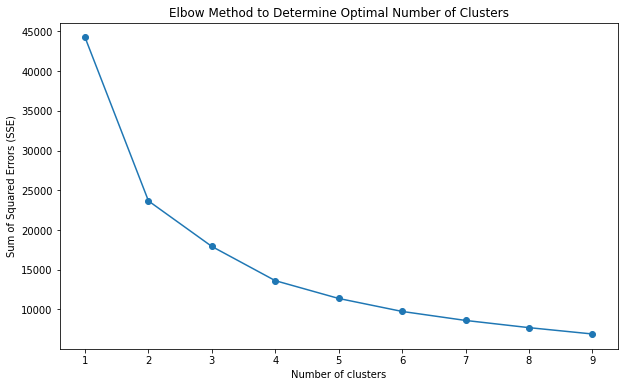

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 4

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [13]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.340
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.326
Average Silhouette Score for Hierarchical Clustering: 0.291


In [14]:
k_clustered_teams = clustered_teams.drop(columns=['GMM_Labels', 'BKMeans_Labels'])
final_df.reset_index(inplace = True)
df_with_clusters = final_df.merge(k_clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)
df_with_clusters = df_with_clusters.drop([col for col in df_with_clusters.columns if "ID" in col or "Id" in col], axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = df_with_clusters

# Split the DataFrame into features (X) and the target variable (y)
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store the evaluation metrics of each model
evaluation_metrics = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

evaluation_metrics

{'Logistic Regression': {'Accuracy': 0.9863201094391245,
  'Precision': 0.9863462351328716,
  'Recall': 0.9863201094391245,
  'F1 Score': 0.9863146999326959},
 'Support Vector Machine': {'Accuracy': 0.948016415868673,
  'Precision': 0.9484816622042112,
  'Recall': 0.948016415868673,
  'F1 Score': 0.9480200494717803},
 'Random Forest': {'Accuracy': 0.8905608755129959,
  'Precision': 0.8907842319584273,
  'Recall': 0.8905608755129959,
  'F1 Score': 0.8905982509308096},
 'K-Nearest Neighbors': {'Accuracy': 0.8454172366621067,
  'Precision': 0.846021671796673,
  'Recall': 0.8454172366621067,
  'F1 Score': 0.844945114923349}}

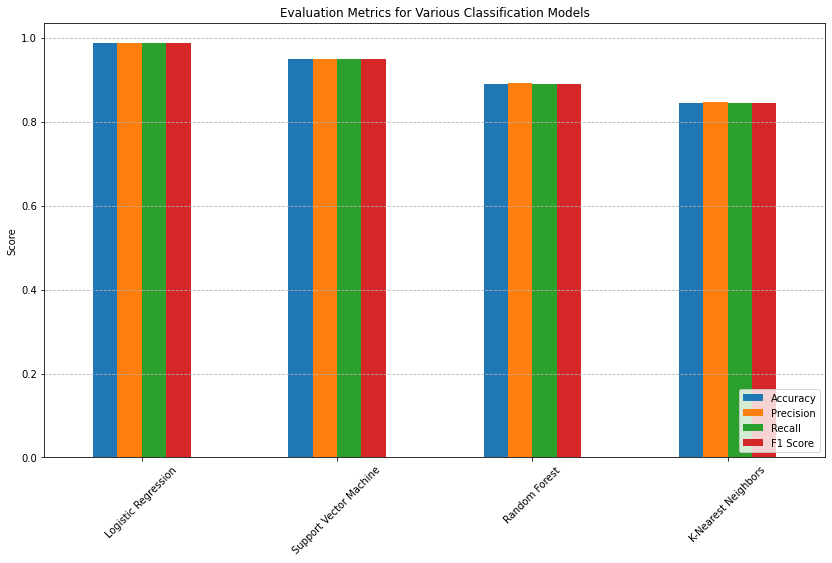

In [16]:
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Evaluation Metrics for Various Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='lower right')
plt.show()


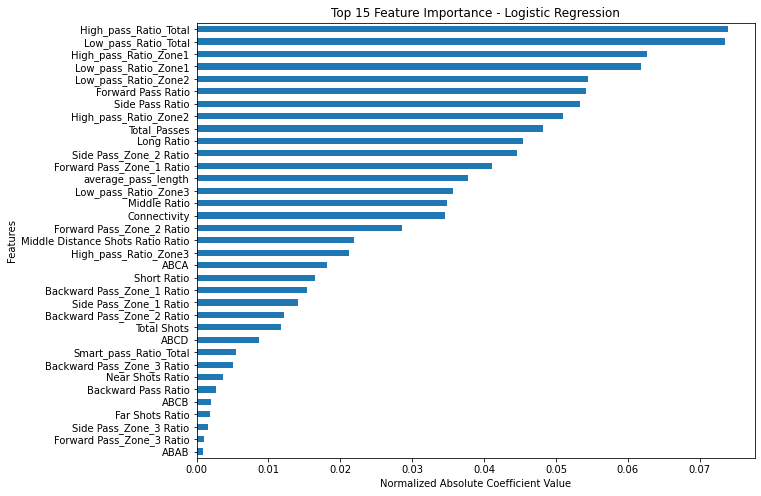

In [17]:
# Preprocessing steps
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extract the coefficients
coefficients = logistic_model.coef_[0]

# Take the absolute value of the coefficients and normalize
abs_coefficients = np.abs(coefficients)
normalized_coefficients = abs_coefficients / abs_coefficients.sum()

# Map normalized coefficients to feature names
feature_importance = pd.Series(normalized_coefficients, index=X.columns)

# Sorting the features by importance and selecting the top 15
top_15_features = feature_importance.sort_values(ascending=False).head(15)

# Plotting the top 15 features
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importance - Logistic Regression')
plt.xlabel('Normalized Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

In [18]:
top10 = list(dict(feature_importance.sort_values(ascending=False).head(10)).keys())
selected_features_df = final_df.loc[:, top10]
selected_features_df.fillna(0, inplace=True)


###
selected_features_df = final_df.copy()

In [19]:
scaler = StandardScaler()
selected_features_df.fillna(0, inplace=True)
scaled_data = scaler.fit_transform(selected_features_df.iloc[:,1:])

pca = PCA(n_components=2)
final_df_scaled = pca.fit_transform(scaled_data)

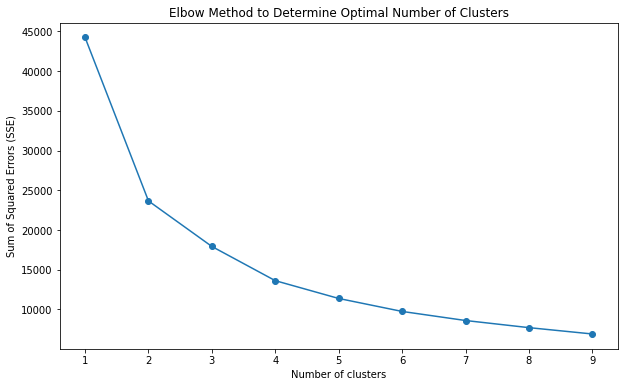

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 3

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [22]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.320
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.323
Average Silhouette Score for Hierarchical Clustering: 0.308


In [23]:
with open("../../matches/matches_England.json", "r") as file:
    matches_data_2 = json.load(file)

matches2 = pd.DataFrame(matches_data_2)

with open("../../matches/matches_France.json", "r") as file:
    matches_data_3 = json.load(file)

matches3 = pd.DataFrame(matches_data_3)

with open("../../matches/matches_Germany.json", "r") as file:
    matches_data_4 = json.load(file)

matches4 = pd.DataFrame(matches_data_4)

with open("../../matches/matches_Italy.json", "r") as file:
    matches_data_5 = json.load(file)

matches5 = pd.DataFrame(matches_data_5)

with open("../../matches/matches_Spain.json", "r") as file:
    matches_data_6 = json.load(file)

matches6 = pd.DataFrame(matches_data_6)

all_matches_df = pd.concat([matches2, matches3, matches4, matches5, matches6], ignore_index=True)

with open("../../events/teams.json", "r") as file:
    teams_data = json.load(file)

teams_df = pd.DataFrame(teams_data)

In [24]:
final_df = final_df.reset_index()
df_with_clusters = final_df.merge(clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)

In [25]:
matches_with_clusters = df_with_clusters.merge(all_matches_df, left_on='matchId', right_on='wyId')

In [65]:
matches_with_clusters['Match_Result'] = matches_with_clusters.apply(
    lambda row: 'Draw' if row['winner'] == 0 else ('Win' if row['winner'] == row['teamId'] else 'Lose'), axis=1)

# Group by cluster label and match result
outcome_counts = matches_with_clusters.groupby(['KMeans_Labels', 'Match_Result']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100
outcome_percentages_1 = outcome_percentages

In [67]:
outcome_percentages_1 

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,25.380402,42.970177,31.649422
1,29.735683,36.013216,34.251101
2,20.072661,30.790191,49.137148


In [28]:
# Map each team to its cluster
team_to_cluster_map = dict(zip(clustered_teams['TeamID'], clustered_teams['KMeans_Labels']))

# Create a function to get opponent cluster
def get_opponent_cluster(row):
    for team in row['teamsData']:
        if int(team) != int(row['teamId']):
            t = str(team)
            m = str(row['matchId'])
            g = t + "---" + m
            return team_to_cluster_map.get(g)
    

matches_with_clusters['Opponent_Cluster'] = matches_with_clusters.apply(get_opponent_cluster, axis=1)

In [29]:
# Grouping by cluster and opponent cluster
grouped = matches_with_clusters.groupby(['KMeans_Labels', 'Opponent_Cluster', 'Match_Result'])

# Counting occurrences
outcome_counts = grouped.size().unstack(fill_value=0)

# Calculating percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Reshaping for a 9x3 matrix
outcome_matrix = outcome_percentages.unstack()

In [30]:
outcome_matrix

Match_Result           Draw                             Lose             \
Opponent_Cluster          0          1          2          0          1   
KMeans_Labels                                                             
0                 25.706215  32.608696  20.282187  37.146893  36.956522   
1                 32.608696  29.661017  26.315789  30.434783  35.169492   
2                 20.282187  26.315789  11.304348  25.573192  30.263158   

Match_Result                       Win                        
Opponent_Cluster          2          0          1          2  
KMeans_Labels                                                 
0                 54.144621  37.146893  30.434783  25.573192  
1                 43.421053  36.956522  35.169492  30.263158  
2                 44.347826  54.144621  43.421053  44.347826

# ÇOĞUNLUK OYLMASI YAP

In [31]:
matches_with_clusters.columns

Index(['index', 'uniqueTeamId', 'ABAB', 'ABCA', 'ABCB', 'ABCD', 'Total_Passes',
       'High_pass_Ratio_Total', 'Low_pass_Ratio_Total',
       'Smart_pass_Ratio_Total', 'High_pass_Ratio_Zone2',
       'Low_pass_Ratio_Zone2', 'High_pass_Ratio_Zone3', 'Low_pass_Ratio_Zone3',
       'High_pass_Ratio_Zone1', 'Low_pass_Ratio_Zone1',
       'Backward Pass_Zone_1 Ratio', 'Backward Pass_Zone_2 Ratio',
       'Backward Pass_Zone_3 Ratio', 'Forward Pass_Zone_1 Ratio',
       'Forward Pass_Zone_2 Ratio', 'Forward Pass_Zone_3 Ratio',
       'Side Pass_Zone_1 Ratio', 'Side Pass_Zone_2 Ratio',
       'Side Pass_Zone_3 Ratio', 'Backward Pass Ratio', 'Forward Pass Ratio',
       'Side Pass Ratio', 'Short Ratio', 'Middle Ratio', 'Long Ratio',
       'average_pass_length', 'Total Shots', 'Far Shots Ratio',
       'Middle Distance Shots Ratio Ratio', 'Near Shots Ratio', 'Connectivity',
       'TeamID', 'KMeans_Labels', 'GMM_Labels', 'BKMeans_Labels', 'matchId',
       'teamId', 'status', 'roundId', 'game

In [32]:
matches_with_clusters

,index,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,Smart_pass_Ratio_Total,...,winner,venue,wyId,label,date,referees,duration,competitionId,Match_Result,Opponent_Cluster
0,0,10531---2499726,0.047619,0.085714,0.085714,0.780952,213,0.145540,0.849765,0.004695,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,2
1,228,1619---2499726,0.030075,0.056391,0.056391,0.857143,269,0.126394,0.847584,0.026022,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,0
2,1,10531---2499736,0.029787,0.080851,0.080851,0.808511,238,0.155462,0.836134,0.008403,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Lose,2
3,115,1611---2499736,0.066246,0.069401,0.078864,0.785489,320,0.071875,0.906250,0.021875,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Win,0
4,2,10531---2499741,0.034043,0.072340,0.072340,0.821277,238,0.168067,0.823529,0.008403,...,10531,Selhurst Park,2499741,"Crystal Palace - Swansea City, 0 - 2","August 26, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",Regular,364,Win,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3600,714---2565792,0.030172,0.086207,0.081897,0.801724,235,0.157447,0.829787,0.012766,...,0,Estadio Municipal de Butarque,2565792,"Legan\u00e9s - Las Palmas, 0 - 0","February 24, 2018 at 6:30:00 PM GMT+1","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Draw,1
3648,3594,714---2565728,0.033333,0.066667,0.071429,0.828571,213,0.112676,0.840376,0.046948,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Lose,1
3649,3632,756---2565728,0.021739,0.081522,0.086957,0.809783,187,0.181818,0.775401,0.042781,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Win,0
3650,3613,714---2565923,0.018657,0.063433,0.067164,0.850746,271,0.107011,0.878229,0.014760,...,756,Estadio de Gran Canaria,2565923,"Las Palmas - Girona, 1 - 2","May 19, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Lose,1


In [33]:
clustered_teams

,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels
0,10531---2499726,0,2,0
1,10531---2499736,0,2,1
2,10531---2499741,0,2,0
3,10531---2499757,0,2,0
4,10531---2499766,1,1,0
...,...,...,...,...
3647,756---2565880,0,2,0
3648,756---2565892,0,2,1
3649,756---2565904,1,1,0
3650,756---2565908,0,2,0


In [34]:
clustered_teams_with_names = matches_with_clusters.merge(teams_df, left_on='teamId', right_on='wyId')

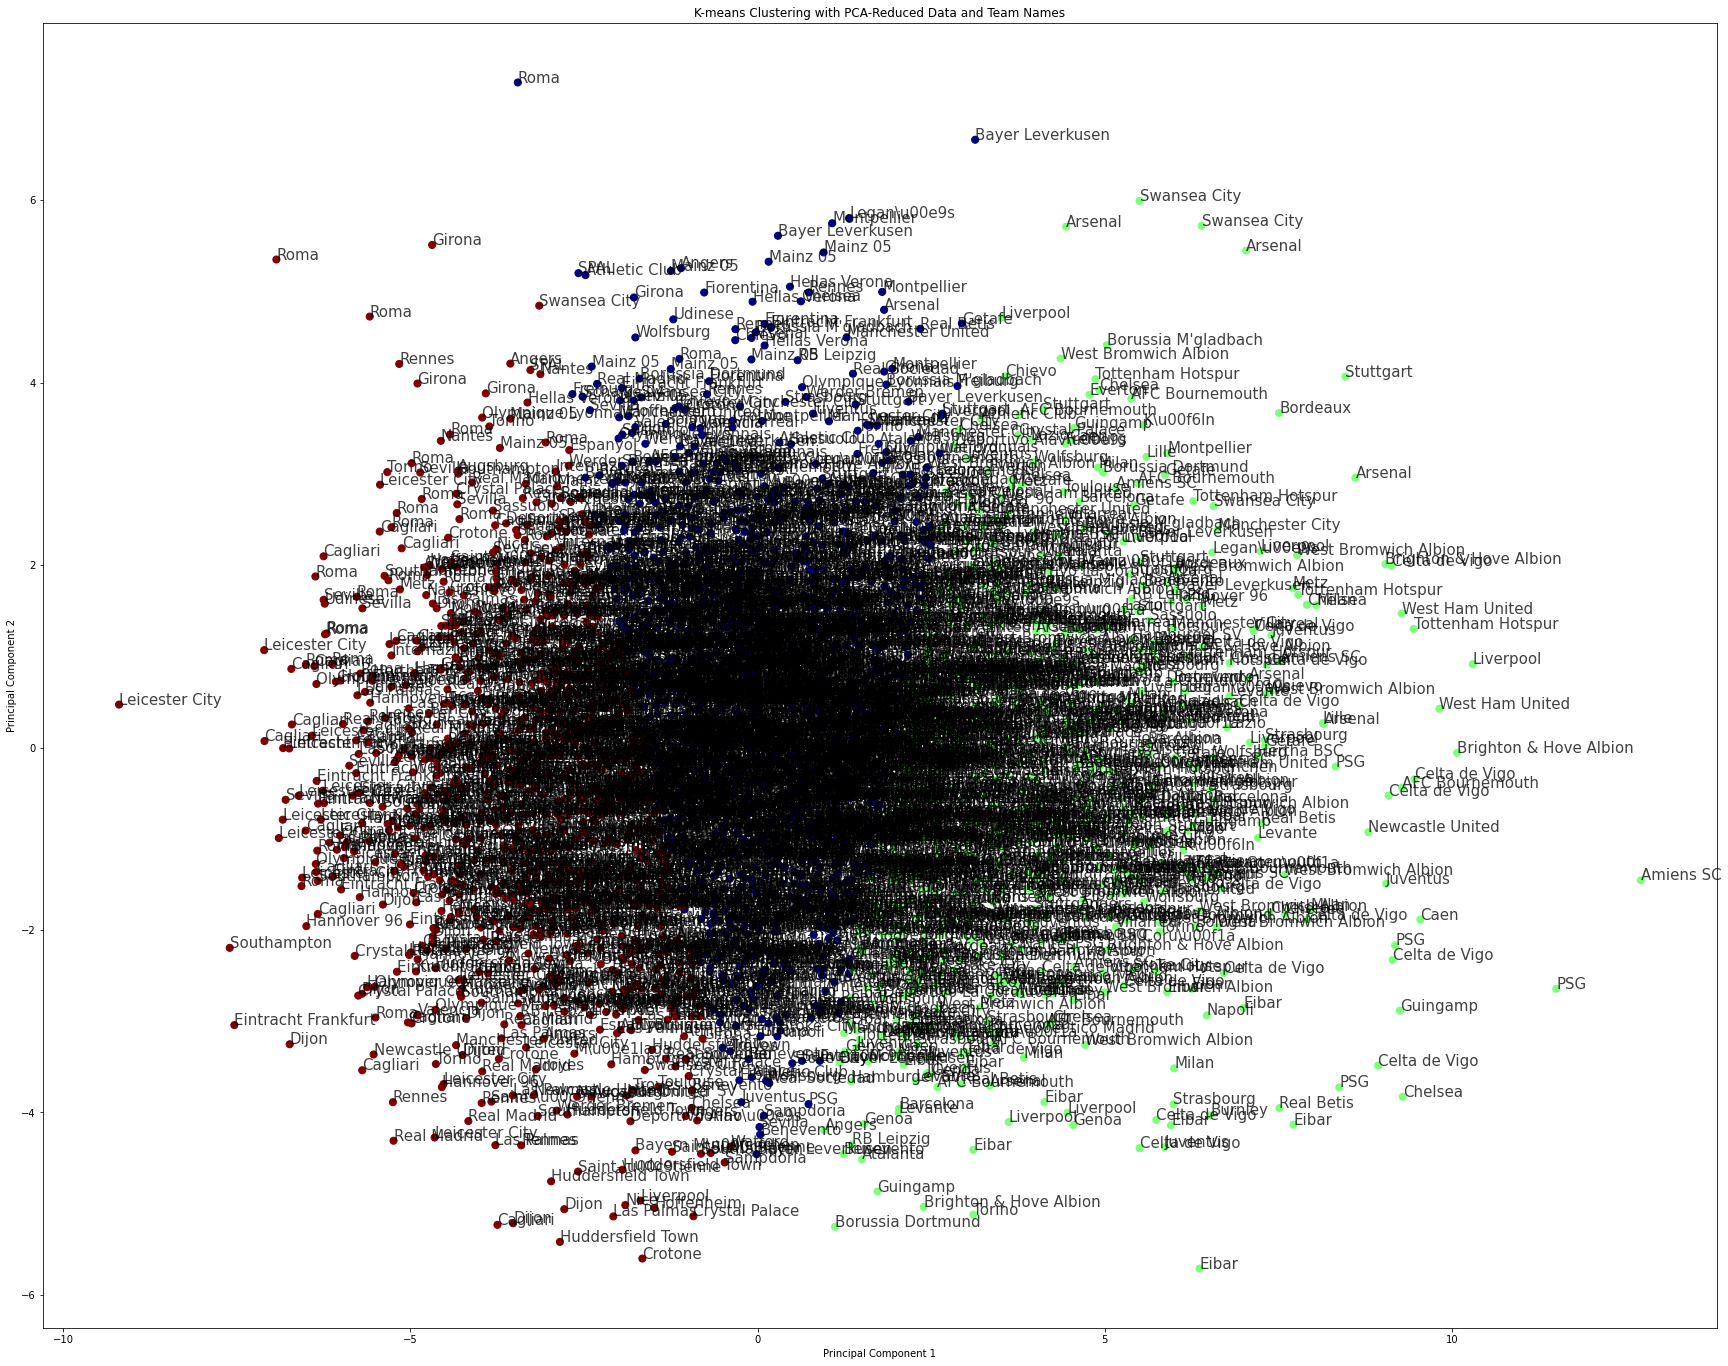

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_df_scaled)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(clustered_teams_with_names['name']):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [36]:
labeled_team_df = matches_with_clusters.loc[:,['uniqueTeamId', 'matchId', 'teamId', 'KMeans_Labels']]

In [37]:
labeled_team_df

,uniqueTeamId,matchId,teamId,KMeans_Labels
0,10531---2499726,2499726,10531,0
1,1619---2499726,2499726,1619,2
2,10531---2499736,2499736,10531,0
3,1611---2499736,2499736,1611,2
4,10531---2499741,2499741,10531,0
...,...,...,...,...
3647,714---2565792,2565792,714,0
3648,714---2565728,2565728,714,0
3649,756---2565728,2565728,756,1
3650,714---2565923,2565923,714,2


In [38]:
unique, counts = np.unique(labeled_team_df.KMeans_Labels, return_counts=True)
dict(zip(unique, counts))

{0: 1643, 1: 908, 2: 1101}

In [40]:
# Step 1: Aggregate data by 'teamId' and 'KMeans_Labels' and count occurrences
label_counts = labeled_team_df.groupby(['teamId', 'KMeans_Labels']).size().reset_index(name='counts')

# Step 2: Calculate probability of each label for each team
total_counts = labeled_team_df['teamId'].value_counts().reset_index()
total_counts.columns = ['teamId', 'total']

# Merge counts with total counts to calculate probabilities
label_prob = pd.merge(label_counts, total_counts, on='teamId')
label_prob['probability'] = label_prob['counts'] / label_prob['total']

# Pivot the data to have labels as columns
prob_pivot = label_prob.pivot(index='teamId', columns='KMeans_Labels', values='probability').fillna(0)

prob_pivot['max_label'] = prob_pivot.iloc[:, :-1].idxmax(axis=1)


# Ensuring all labels are represented
all_labels = sorted(labeled_team_df['KMeans_Labels'].unique())
for label in all_labels:
    if label not in prob_pivot.columns:
        prob_pivot[label] = 0  # Add missing label columns with 0 probability

# Now, recalculate max_label
prob_pivot['max_label'] = prob_pivot[all_labels].idxmax(axis=1)

# The updated DataFrame prob_pivot should now correctly reflect the max_label including label '3'
majority_voting_res = prob_pivot

majority_voting_res = majority_voting_res.reset_index()

In [41]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label
0,674,0.605263,0.052632,0.342105,0
1,675,0.078947,0.000000,0.921053,2
2,676,0.078947,0.000000,0.921053,2
3,677,0.552632,0.263158,0.184211,0
4,678,0.552632,0.368421,0.078947,0
...,...,...,...,...,...
93,3795,0.710526,0.157895,0.131579,0
94,3799,0.631579,0.236842,0.131579,0
95,3804,0.657895,0.263158,0.078947,0
96,10531,0.657895,0.236842,0.105263,0


In [42]:
def extract_value(row):
        # Check if the index is within the valid range for the DataFrame columns
        if row['max_label'] < 0 or row['max_label'] >= len(majority_voting_res.columns):
            raise IndexError(f"Index {row['max_label']} out of bounds for column lookup.")
        
        val = row["max_label"]
        return row[val]

majority_voting_res['max_label_prob'] = majority_voting_res.apply(extract_value, axis=1)

In [43]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
0,674,0.605263,0.052632,0.342105,0,0.605263
1,675,0.078947,0.000000,0.921053,2,0.921053
2,676,0.078947,0.000000,0.921053,2,0.921053
3,677,0.552632,0.263158,0.184211,0,0.552632
4,678,0.552632,0.368421,0.078947,0,0.552632
...,...,...,...,...,...,...
93,3795,0.710526,0.157895,0.131579,0,0.710526
94,3799,0.631579,0.236842,0.131579,0,0.631579
95,3804,0.657895,0.263158,0.078947,0,0.657895
96,10531,0.657895,0.236842,0.105263,0,0.657895


In [44]:
unique, counts = np.unique(majority_voting_res.max_label, return_counts=True)
dict(zip(unique, counts))

{0: 55, 1: 17, 2: 26}

In [45]:
np.quantile(majority_voting_res.max_label_prob, .3)

0.5317337461300309

In [46]:
filtered_major = majority_voting_res[majority_voting_res['max_label_prob']>= .5]

In [47]:
teams_df = teams_df.loc[:,["wyId", "name"]]

merged_df_tmp = pd.merge(majority_voting_res, teams_df, left_on='teamId', right_on='wyId', how='left')

# Selecting the columns to include in the final DataFrame (if needed to remove the ID from df2)
majority_voting_res_named = merged_df_tmp.drop(columns=['wyId'])

In [48]:
team_ids

0       10531---2499726
1       10531---2499736
2       10531---2499741
3       10531---2499757
4       10531---2499766
             ...       
3647      756---2565880
3648      756---2565892
3649      756---2565904
3650      756---2565908
3651      756---2565923
Name: uniqueTeamId, Length: 3652, dtype: object

In [49]:
#selected_features_df["uniqueTeamId"] = team_ids
#selected_features_df = selected_features_df.reset_index()
selected_features_df['teamId'] = team_ids.apply(lambda x: x.split("---")[0])

In [50]:
filtered_major

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
0,674,0.605263,0.052632,0.342105,0,0.605263
1,675,0.078947,0.000000,0.921053,2,0.921053
2,676,0.078947,0.000000,0.921053,2,0.921053
3,677,0.552632,0.263158,0.184211,0,0.552632
4,678,0.552632,0.368421,0.078947,0,0.552632
...,...,...,...,...,...,...
93,3795,0.710526,0.157895,0.131579,0,0.710526
94,3799,0.631579,0.236842,0.131579,0,0.631579
95,3804,0.657895,0.263158,0.078947,0,0.657895
96,10531,0.657895,0.236842,0.105263,0,0.657895


In [51]:
grouped_mean_df = selected_features_df.groupby('teamId').mean().reset_index()
grouped_mean_df.teamId = grouped_mean_df.teamId.astype(int)
team_name_n_label_df = majority_voting_res_named.loc[:,["teamId", "name", "max_label"]]
grouped_mean_df = grouped_mean_df.merge(team_name_n_label_df)
grouped_mean_df = pd.merge(grouped_mean_df, filtered_major, on='teamId', how='inner')


names = grouped_mean_df.name
labels = grouped_mean_df.max_label_x

grouped_mean_df = grouped_mean_df.iloc[:,1:31]

In [52]:
scaled_data

array([[ 0.86278961,  0.2102067 ,  0.17917452, ..., -1.41701268,
         3.15550908, -1.18933958],
       [-0.37468986, -0.08633524, -0.11964213, ...,  0.42852731,
        -1.08501679, -0.75938431],
       [-0.07938226, -0.60528363, -0.64257126, ..., -1.41701268,
         3.15550908, -0.63845939],
       ...,
       [-0.15715874, -1.7542311 , -1.80033205, ...,  1.43982322,
        -0.23691162,  0.4901732 ],
       [ 1.00504201,  0.43519072,  0.81279938, ..., -0.26491165,
        -0.23691162, -0.63270106],
       [-0.52479096, -1.98436749, -2.03223375, ...,  0.37336172,
        -0.02488532, -0.38317344]])

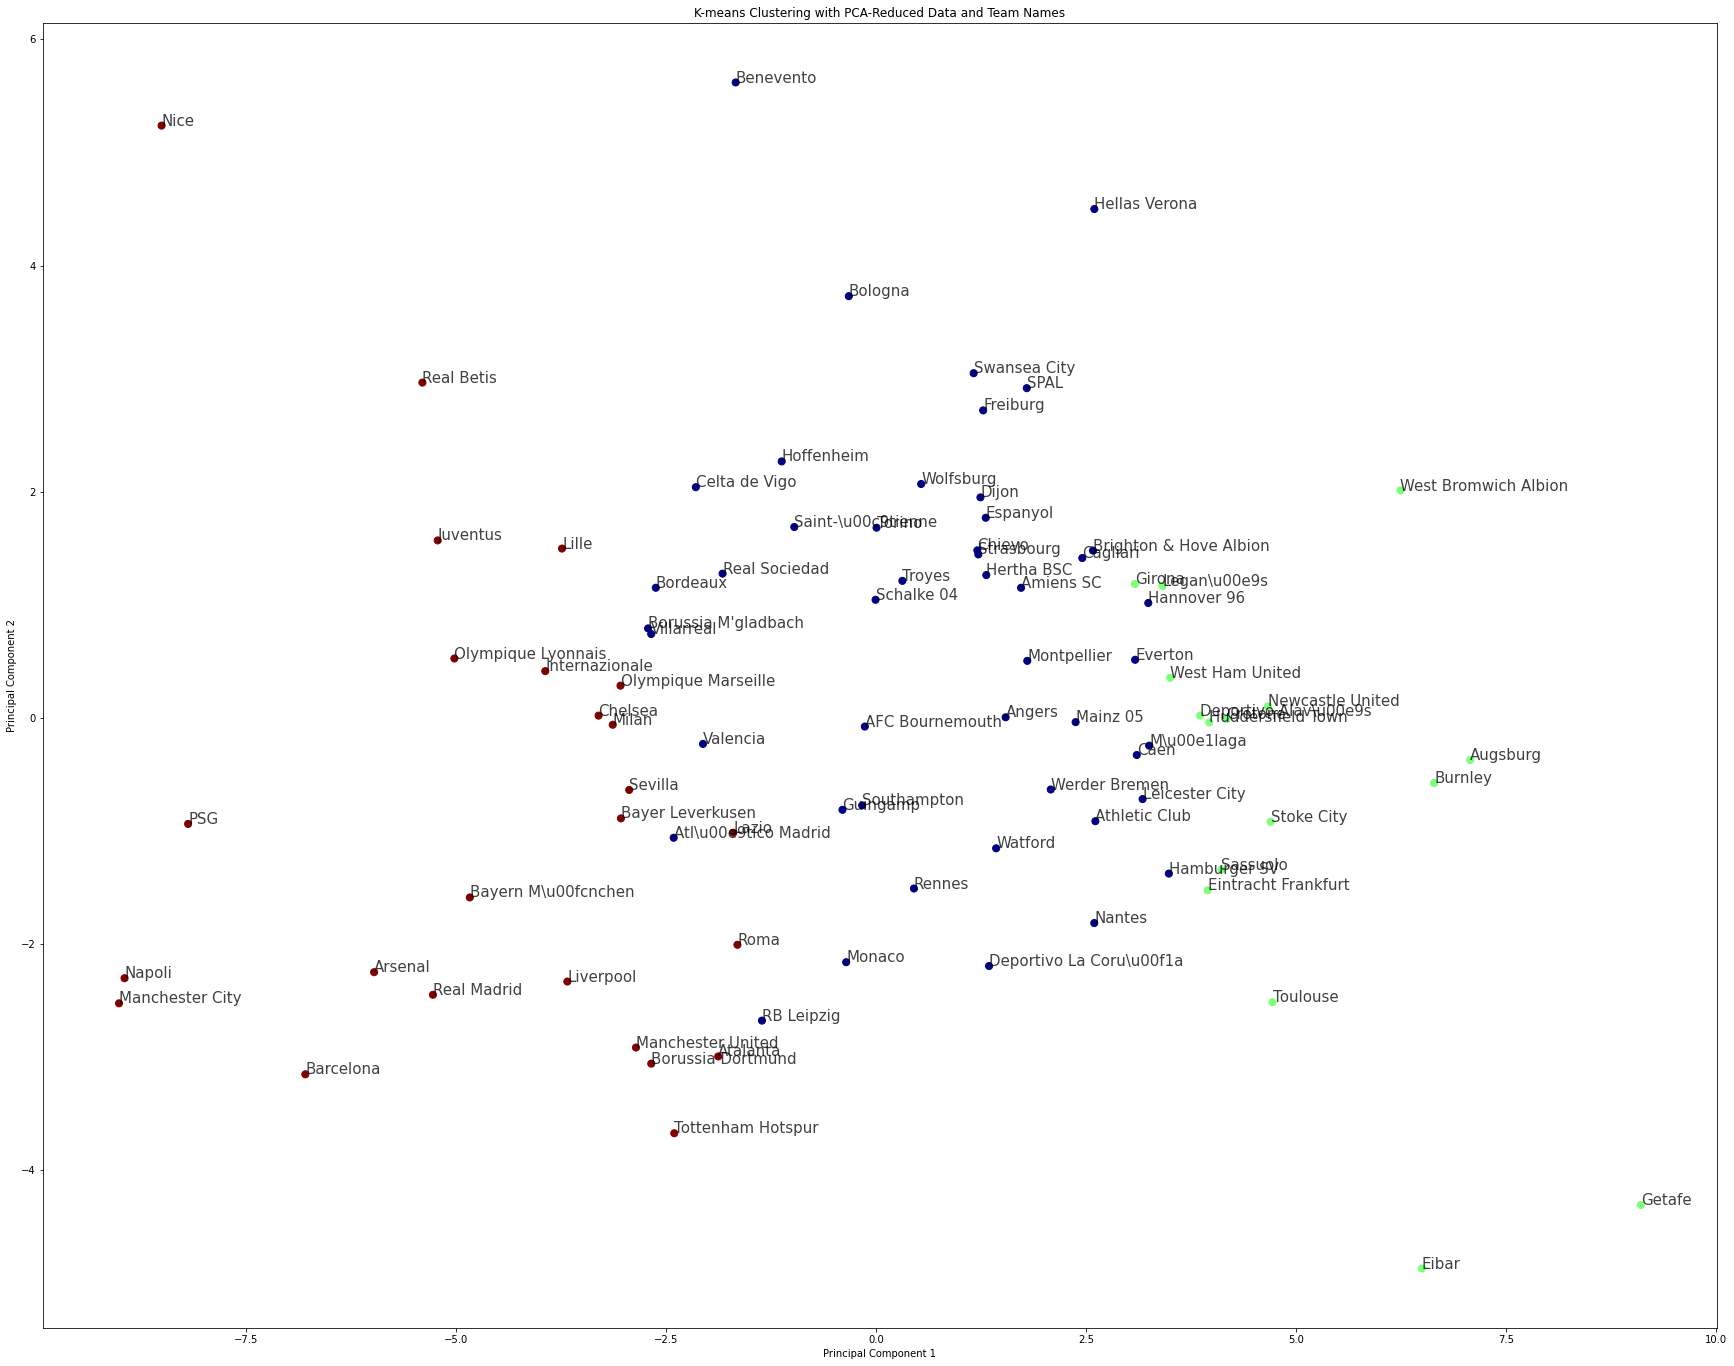

Loadings:
                                  PC1       PC2
ABAB                       -0.024000  0.094311
ABCA                       -0.107488  0.087196
ABCB                       -0.105170  0.108939
ABCD                        0.102514 -0.120247
Total_Passes               -0.223452 -0.144449
High_pass_Ratio_Total       0.260869  0.015801
Low_pass_Ratio_Total       -0.261110  0.009811
Smart_pass_Ratio_Total     -0.045250 -0.274774
High_pass_Ratio_Zone2       0.251952 -0.014881
Low_pass_Ratio_Zone2       -0.252169  0.025658
High_pass_Ratio_Zone3       0.204744  0.103022
Low_pass_Ratio_Zone3       -0.203208 -0.052730
High_pass_Ratio_Zone1       0.250537 -0.023980
Low_pass_Ratio_Zone1       -0.250710  0.024766
Backward Pass_Zone_1 Ratio  0.048705  0.366675
Backward Pass_Zone_2 Ratio -0.029045  0.153741
Backward Pass_Zone_3 Ratio -0.030764 -0.337870
Forward Pass_Zone_1 Ratio   0.221601  0.197486
Forward Pass_Zone_2 Ratio   0.161657 -0.233480
Forward Pass_Zone_3 Ratio   0.019547 -0.411445
Si

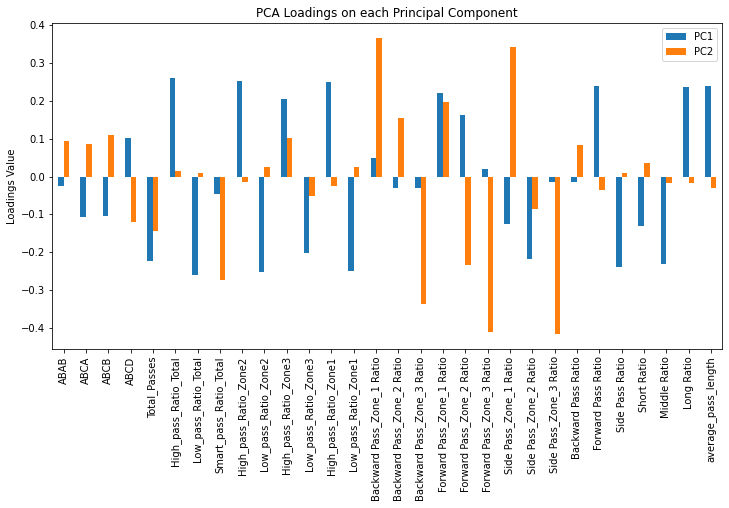

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

scaled_data = scaler.fit_transform(grouped_mean_df)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(names):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the loadings (components)
loadings = pca.components_.T
feature_names = grouped_mean_df.columns

# Create a DataFrame of loadings with features
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
print("Loadings:\n", loading_matrix)

# Optionally, plot the magnitude of each loading per principal component
loading_matrix.plot(kind='bar', figsize=(12, 6), title="PCA Loadings on each Principal Component")
plt.ylabel('Loadings Value')
plt.show()

In [54]:
df_with_clusters

,index,uniqueTeamId,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,Smart_pass_Ratio_Total,...,Far Shots Ratio,Middle Distance Shots Ratio Ratio,Near Shots Ratio,Connectivity,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels,matchId,teamId
0,0,10531---2499726,0.047619,0.085714,0.085714,0.780952,213,0.145540,0.849765,0.004695,...,0.000,0.000000,1.00,5.051282,10531---2499726,0,2,0,2499726,10531
1,1,10531---2499736,0.029787,0.080851,0.080851,0.808511,238,0.155462,0.836134,0.008403,...,0.500,0.002101,0.00,5.461538,10531---2499736,0,2,1,2499736,10531
2,2,10531---2499741,0.034043,0.072340,0.072340,0.821277,238,0.168067,0.823529,0.008403,...,0.000,0.000000,1.00,5.576923,10531---2499741,0,2,0,2499741,10531
3,3,10531---2499757,0.021583,0.082734,0.079137,0.816547,281,0.153025,0.832740,0.014235,...,0.000,0.000000,1.00,5.589744,10531---2499757,0,2,0,2499757,10531
4,4,10531---2499766,0.030675,0.104294,0.110429,0.754601,166,0.234940,0.753012,0.012048,...,0.000,0.000000,1.00,4.285714,10531---2499766,1,1,0,2499766,10531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3647,756---2565880,0.050388,0.089147,0.089147,0.771318,261,0.187739,0.800766,0.011494,...,0.000,0.001916,0.50,5.021978,756---2565880,0,2,0,2565880,756
3648,3648,756---2565892,0.048246,0.109649,0.114035,0.728070,231,0.155844,0.835498,0.008658,...,0.500,0.002165,0.00,6.666667,756---2565892,0,2,1,2565892,756
3649,3649,756---2565904,0.032922,0.053498,0.053498,0.860082,246,0.231707,0.756098,0.012195,...,0.000,0.003252,0.20,6.653846,756---2565904,1,1,0,2565904,756
3650,3650,756---2565908,0.049669,0.089404,0.096026,0.764901,305,0.144262,0.839344,0.016393,...,0.400,0.001311,0.20,5.582418,756---2565908,0,2,0,2565908,756


In [63]:
clustered_df_for_stats = pd.DataFrame(df_with_clusters.iloc[:, 2:39])

# List of columns to exclude from aggregation
cols_to_exclude = ['KMeans_Labels', 'TeamID']

# List of columns to include in the aggregation
cols_to_include = [col for col in clustered_df_for_stats.columns if col not in cols_to_exclude]

# Group by 'GMM_Labels' and calculate the mean and quantiles for each cluster
stats_per_cluster = clustered_df_for_stats.groupby('KMeans_Labels')[cols_to_include].agg('mean')
# Renaming the lambda functions for clarity in the output
#stats_per_cluster.columns = stats_per_cluster.columns.map('_'.join).str.replace('<lambda_0>', '25th_percentile').str.replace('<lambda_1>', '50th_percentile (median)').str.replace('<lambda_2>', '75th_percentile')

stats_per_cluster

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,Smart_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,...,Side Pass Ratio,Short Ratio,Middle Ratio,Long Ratio,average_pass_length,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio Ratio,Near Shots Ratio,Connectivity
KMeans_Labels,,,,,,,,,,,,,,,,,,,,,
0,0.035518,0.084237,0.084772,0.795473,260.861229,0.146327,0.837810,0.015863,0.090218,0.893434,...,0.480586,0.332700,0.325182,0.342119,24.386021,4.393792,0.311429,0.001590,0.251950,6.117039
1,0.034706,0.077551,0.078062,0.809680,227.632159,0.208425,0.772971,0.018604,0.136107,0.843682,...,0.430369,0.313935,0.298853,0.387211,26.600848,4.687225,0.298796,0.001980,0.241497,5.685142
2,0.035089,0.083215,0.083758,0.797938,313.034514,0.094583,0.889564,0.015853,0.060076,0.927064,...,0.531312,0.338023,0.352788,0.309189,23.192830,5.529519,0.298568,0.001345,0.273568,6.702402


In [64]:
outcome_percentages

Match_Result                         Draw       Lose        Win
KMeans_Labels Opponent_Cluster                                 
0             0                 25.706215  37.146893  37.146893
              1                 32.608696  36.956522  30.434783
              2                 20.282187  54.144621  25.573192
1             0                 32.608696  30.434783  36.956522
              1                 29.661017  35.169492  35.169492
              2                 26.315789  43.421053  30.263158
2             0                 20.282187  25.573192  54.144621
              1                 26.315789  30.263158  43.421053
              2                 11.304348  44.347826  44.347826

In [68]:
outcome_percentages_1

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,25.380402,42.970177,31.649422
1,29.735683,36.013216,34.251101
2,20.072661,30.790191,49.137148


In [85]:
majority_voting_res.iloc[:,:-2].to_csv('../cluster_probs/trans_poss_cluster_probs.csv', index=True)
majority_voting_res.iloc[:,:-2]

KMeans_Labels,teamId,0,1,2
0,674,0.605263,0.052632,0.342105
1,675,0.078947,0.000000,0.921053
2,676,0.078947,0.000000,0.921053
3,677,0.552632,0.263158,0.184211
4,678,0.552632,0.368421,0.078947
...,...,...,...,...
93,3795,0.710526,0.157895,0.131579
94,3799,0.631579,0.236842,0.131579
95,3804,0.657895,0.263158,0.078947
96,10531,0.657895,0.236842,0.105263
